# Simulation Project 2018

This jupyter notebook contains a project for the course Programming for Data Analysis. This project will attempt to model and synthesize data from a real-world phenomenon. It also investigates the types of variables involved and the relationships of the variables with each other. The notebook initially calculates data from the study according to gender and mortality rates, then  some generalizations are drawn from the calculations. More data are drawn from the study including the amount of people infected per month and 7 and 30 day mortality per month. This notebook then presents calculations to breakdown infections and mortality rates by gender.  


Modelling and simulation refers to the process of constructing, manipulating, graphical or algorithmic representations of real life systems or phenomenon [1].  The phenomenon chosen for this project is based on a research paper [2] to determine the short term risk of death in people following healthcare-related meticillin-resistant Staphylococcus Aureus (MRSA) infection. The research was conducted between 2004 and 2005 from hospital reported cases in England and Wales. The data represents the number of people who are infected with MRSA and grouped across gender, age, and mortality within 7 and 30 days post infection. The research study was careful to point out though that they could not estimate how many deaths were attributable to MRSA. 

Some notable findings of the study include; 
* Higher incidence of fatality within seven days post MRSA infection.
* Higher incidence of fatality of women within seven days post MRSA infection.
* Risk of death increased with age.
* A seasonal pattern in case fatality and infection, highest in winter.

The research paper presented the data in a summary form and this project attempted to recreate the data and replicate some of the findings of the study. Is is envisioned that further study through the course will enhance modelling and simulation techniques for investigating such data and develop accurate prediction of events.  






### Import the necessary software packages to be used in this investigation


In [1]:
# numpy is the software package for computing
import numpy as np
# pandas is a software package that deals with dataframes and data structures
import pandas as pd
# matplotlib is a software package that presents data graphically
import matplotlib.pyplot as plt
# seaborn is a data visualization software package based on matplotlib
import seaborn as sns



In [2]:
# magic command to display plots within the notebook
%matplotlib inline

### Initial calculations on the data from the research paper. 
Presented below is the data from the study, comments are incorporated to identify the variables.

In [3]:
# total number of infected male  
infectedmale = 5575
# total number of infected female
infectedfemale = 3426
# total male mortality
malemort = 3180
# total female mortality
femalemort = 2095
# total female mortality within 7 days post infection
female_7day_mort = 750
# total male mortality within 7 days post infection
male_7day_mort = 1075
# total female mortality within 30 days post infection
female_30day_mort = 1345
# total male mortality within 30 days post infection
male_30day_mort = 2105


In [4]:
# total number of infected persons, male and female
totalInfection = infectedmale + infectedfemale
totalInfection

9001

In [5]:
# percentage rate for mortality
mortalityrate = (malemort + femalemort) / (infectedmale + infectedfemale)
mortalityrate

0.5860459948894567

In [6]:
# percentage rate for male infections
maleInfectionRate = infectedmale / totalInfection
maleInfectionRate

0.6193756249305633

In [7]:
# percentage rate for female infections
femaleInfectionRate = infectedfemale / totalInfection
femaleInfectionRate

0.38062437506943675

In [8]:
# sum total of mortality
totalmort = malemort + femalemort
totalmort

5275

#### Initial generalizations drawn from the calculations
There appears to be a higher risk of mortality in females within 7 days post infection. The study could not provide a clear explanation for the phenomenon. This was also the case in a similar Canadian study [2] and could not be explained.

In [9]:
# 7 day post infection mortality percentage rate for male
ratio_male7daymort = male_7day_mort /infectedmale
ratio_male7daymort

0.19282511210762332

In [10]:
# 7 day post infection mortality percentage rate for female
ratio_female7daymort = female_7day_mort/infectedfemale
ratio_female7daymort

0.21891418563922943

In [11]:
# percentage rate of female mortality over all mortality 7 days post infection
rate_7dayF =  female_7day_mort / ( male_7day_mort + female_7day_mort)
rate_7dayF

0.410958904109589

In [12]:
# percentage rate of male mortality over all mortality 7 days post infection
rate_7dayM =  male_7day_mort / ( male_7day_mort + female_7day_mort)
rate_7dayM

0.589041095890411

####  There is no significant increased risk of mortality in females than males within 30 days post infection in the study.

In [15]:
ratio_male30daymort = male_30day_mort/infectedmale
ratio_male30daymort

0.3775784753363229

In [16]:
ratio_female30daymort = female_30day_mort/infectedfemale
ratio_female30daymort

0.39258610624635143

In [43]:
# percentage rate of female mortality over all mortality 30 days post infection
rate_30dayF =  female_30day_mort / ( male_30day_mort + female_30day_mort)
rate_30dayF

0.3898550724637681

In [ ]:
# percentage rate of male mortality over all mortality 30 days post infection
rate_30dayM =  male_30day_mort / ( male_30day_mort + female_30day_mort)
rate_30dayM

#### Overall expected mortality ratios 
The output of these two calculations would be the expected mortality ratios if there was no increased risk of martality in women. It might be the result of bias in the statistics similar to something like Simpsons paradox [4] but it is for another project. Some of the calculations in this section was adapted from Dr. Ian Mcloughlins jupyter notebook [5]. 

In [17]:
# The study finds lower mortality in men overall than women rather than the expected mortality numbers.
expectedmalemort = infectedmale * mortalityrate
expectedmalemort

3267.206421508721

In [18]:
expectedfemalemort = infectedfemale * mortalityrate
expectedfemalemort

2007.7935784912788

### DataFrame created from the data of the study showing the number of infections per month, and mortality within 7 and 30 days of infection.

In [19]:
monthlymort = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], "MRSA infection": (872, 758, 808, 789, 757, 741, 785, 731, 650, 681,708, 721),"7 day mortality": (207, 176, 184, 162, 148, 143, 147, 123, 115, 133, 139, 148), "30 day mortality": (385, 318, 332, 299, 287, 292, 281, 235, 231, 259, 253, 278)})

In [20]:
# Include in the DataFrame probable division of MRSA infection, 7 day mortality and 30 day mortality between gender. 

monthlymort['monthly_M_Infection'] = monthlymort['MRSA infection'] * maleInfectionRate
monthlymort['monthly_F_Infection'] = monthlymort['MRSA infection'] * femaleInfectionRate
monthlymort['Male_mort_7day'] = monthlymort['monthly_M_Infection'] * ratio_male7daymort
monthlymort['Female_mort_7day'] = monthlymort['monthly_F_Infection'] * ratio_female7daymort
monthlymort['Male_mort_30day'] = monthlymort['monthly_M_Infection'] * ratio_male30daymort
monthlymort['Female_mort_30day'] = monthlymort['monthly_F_Infection'] * ratio_female30daymort

# round method just for readability, not reliability.
round(monthlymort,)

,Month,MRSA infection,7 day mortality,30 day mortality,monthly_M_Infection,monthly_F_Infection,Male_mort_7day,Female_mort_7day,Male_mort_30day,Female_mort_30day
0,Jan,872,207,385,540.0,332.0,104.0,73.0,204.0,130.0
1,Feb,758,176,318,469.0,289.0,91.0,63.0,177.0,113.0
2,Mar,808,184,332,500.0,308.0,97.0,67.0,189.0,121.0
3,Apr,789,162,299,489.0,300.0,94.0,66.0,185.0,118.0
4,May,757,148,287,469.0,288.0,90.0,63.0,177.0,113.0
5,Jun,741,143,292,459.0,282.0,88.0,62.0,173.0,111.0
6,Jul,785,147,281,486.0,299.0,94.0,65.0,184.0,117.0
7,Aug,731,123,235,453.0,278.0,87.0,61.0,171.0,109.0
8,Sep,650,115,231,403.0,247.0,78.0,54.0,152.0,97.0
9,Oct,681,133,259,422.0,259.0,81.0,57.0,159.0,102.0


In [21]:
# Add up the variables 
monthlymort.sum()

Month                  JanFebMarAprMayJunJulAugSepOctNovDec
MRSA infection                                         9001
7 day mortality                                        1825
30 day mortality                                       3450
monthly_M_Infection                                    5575
monthly_F_Infection                                    3426
Male_mort_7day                                         1075
Female_mort_7day                                        750
Male_mort_30day                                        2105
Female_mort_30day                                      1345
dtype: object

#### The line plot below shows a trend that follow an increasing number of infection and mortality during winter that decreases towards summer, then climb back up again heading into winter. 

(10, 8)

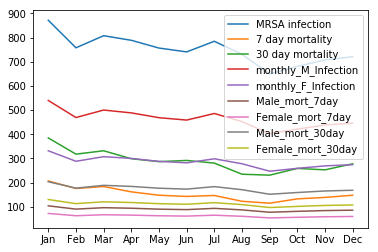

In [22]:
# line plot to visualize relationship of the time of year to infection and mortality counts. 
ax = monthlymort.plot()
ax.set_xticks(monthlymort.index)
ax.set_xticklabels(monthlymort.Month)

# Increase the area of the plot
ax = plt.rcParams['figure.figsize'] = (10, 8)
ax

#### The plots below indicate a positive relationship between the variables.

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


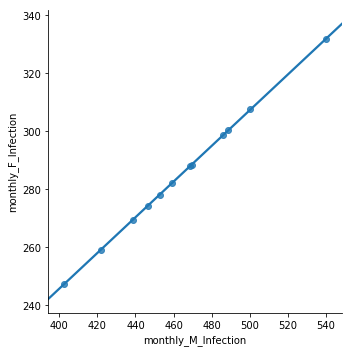

In [23]:
sns.lmplot(x="monthly_M_Infection", y="monthly_F_Infection", data=monthlymort)

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


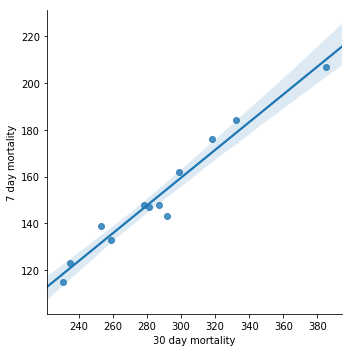

In [24]:
sns.lmplot(y="7 day mortality", x="30 day mortality", data=monthlymort)

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


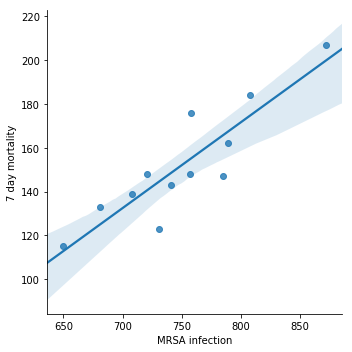

In [25]:
sns.lmplot(x = "MRSA infection", y = "7 day mortality", data = monthlymort)

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


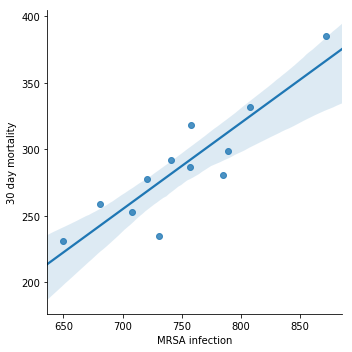

In [26]:
sns.lmplot(x = "MRSA infection", y = "30 day mortality", data = monthlymort)

In [27]:
# add up all the variables.
monthlymort.sum()

Month                  JanFebMarAprMayJunJulAugSepOctNovDec
MRSA infection                                         9001
7 day mortality                                        1825
30 day mortality                                       3450
monthly_M_Infection                                    5575
monthly_F_Infection                                    3426
Male_mort_7day                                         1075
Female_mort_7day                                        750
Male_mort_30day                                        2105
Female_mort_30day                                      1345
dtype: object

In [28]:
# Create a dataframe for 
dateRng = pd.date_range(start='1/1/2004', end='12/30/2004')


In [29]:
mrsaYear = pd.DataFrame(np.random.binomial(25,.62,len(dateRng)), index=dateRng, columns = ['Male Mortality'])
mrsaYear

,Male Mortality
2004-01-01,17
2004-01-02,18
2004-01-03,13
2004-01-04,18
2004-01-05,12
2004-01-06,13
2004-01-07,16
2004-01-08,19
2004-01-09,11
2004-01-10,12


#### Simulate the data for the each month in the 2004. 

In [30]:
# Simulate the data for each month divided into days 
# The parameters of random.binomial was produced individually for each month. This was in the hope of reproducing the trend of higher incidence during winter and lower during summer.
# example M_infection below, 
# 28 was taken from total infection/no. days in a given month, then rounded. Although random.binomial will truncate it anyway.
# .62 is maleInfectionRate
# 31 is the number of days
jan = pd.DataFrame({'M_infection':np.random.binomial(28, .62, 31), 'F_infection': np.random.binomial(28, .38, 31), 'M_7dayMort': np.random.binomial(7, .59, 31), 'F_7dayMort': np.random.binomial(7, .41, 31), 'M_30dayMort': np.random.binomial(12, .61, 31),  'F_30dayMort': np.random.binomial(12, .39, 31) })


In [31]:
feb = pd.DataFrame({'M_infection':np.random.binomial(27, .62, 29), 'F_infection': np.random.binomial(27, .38, 29), 'M_7dayMort': np.random.binomial(6, .59, 29), 'F_7dayMort': np.random.binomial(6, .41, 29), 'M_30dayMort': np.random.binomial(11, .61, 29),  'F_30dayMort': np.random.binomial(11, .39, 29) })

In [32]:
mar = pd.DataFrame({'M_infection':np.random.binomial(27, .62, 31), 'F_infection': np.random.binomial(27, .38, 31), 'M_7dayMort': np.random.binomial(6, .59, 31), 'F_7dayMort': np.random.binomial(6, .41, 31), 'M_30dayMort': np.random.binomial(11, .61, 31),  'F_30dayMort': np.random.binomial(11, .39, 31) })

In [33]:
apr = pd.DataFrame({'M_infection':np.random.binomial(26, .62, 30), 'F_infection': np.random.binomial(26, .38, 30), 'M_7dayMort': np.random.binomial(5, .59, 30), 'F_7dayMort': np.random.binomial(5, .41, 30), 'M_30dayMort': np.random.binomial(10, .61, 30),  'F_30dayMort': np.random.binomial(10, .39, 30) })

In [34]:
may = pd.DataFrame({'M_infection':np.random.binomial(24, .62, 31), 'F_infection': np.random.binomial(24, .38, 31), 'M_7dayMort': np.random.binomial(5, .59, 31), 'F_7dayMort': np.random.binomial(5, .41, 31), 'M_30dayMort': np.random.binomial(9, .61, 31),  'F_30dayMort': np.random.binomial(9, .39, 31) })

In [35]:
jun = pd.DataFrame({'M_infection':np.random.binomial(25, .62, 30), 'F_infection': np.random.binomial(25, .38, 30), 'M_7dayMort': np.random.binomial(5, .59, 30), 'F_7dayMort': np.random.binomial(5, .41, 30), 'M_30dayMort': np.random.binomial(9, .61, 30),  'F_30dayMort': np.random.binomial(9, .39, 30) })

In [36]:
jul = pd.DataFrame({'M_infection':np.random.binomial(25, .62, 31), 'F_infection': np.random.binomial(25, .38, 31), 'M_7dayMort': np.random.binomial(5, .59, 31), 'F_7dayMort': np.random.binomial(5, .41, 31), 'M_30dayMort': np.random.binomial(9, .61, 31),  'F_30dayMort': np.random.binomial(9, .39, 31) })

In [37]:
aug = pd.DataFrame({'M_infection':np.random.binomial(24, .62, 31), 'F_infection': np.random.binomial(24, .38, 31), 'M_7dayMort': np.random.binomial(4, .59, 31), 'F_7dayMort': np.random.binomial(4, .41, 31), 'M_30dayMort': np.random.binomial(8, .61, 31),  'F_30dayMort': np.random.binomial(8, .39, 31) })

In [38]:
sep = pd.DataFrame({'M_infection':np.random.binomial(21, .62, 30), 'F_infection': np.random.binomial(21, .38, 30), 'M_7dayMort': np.random.binomial(4, .59, 30), 'F_7dayMort': np.random.binomial(4, .41, 30), 'M_30dayMort': np.random.binomial(7, .61, 30),  'F_30dayMort': np.random.binomial(7, .39, 30) })

In [39]:
ocr = pd.DataFrame({'M_infection':np.random.binomial(22, .62, 31), 'F_infection': np.random.binomial(22, .38, 31), 'M_7dayMort': np.random.binomial(4, .59, 31), 'F_7dayMort': np.random.binomial(4, .41, 31), 'M_30dayMort': np.random.binomial(8, .61, 31),  'F_30dayMort': np.random.binomial(8, .39, 31) })

In [40]:
nov = pd.DataFrame({'M_infection':np.random.binomial(24, .62, 30), 'F_infection': np.random.binomial(24, .38, 30), 'M_7dayMort': np.random.binomial(5, .59, 30), 'F_7dayMort': np.random.binomial(5, .41, 30), 'M_30dayMort': np.random.binomial(8, .61, 30),  'F_30dayMort': np.random.binomial(8, .39, 30) })

In [41]:
dec = pd.DataFrame({'M_infection':np.random.binomial(23, .62, 31), 'F_infection': np.random.binomial(23, .38, 31), 'M_7dayMort': np.random.binomial(5, .59, 31), 'F_7dayMort': np.random.binomial(5, .41, 31), 'M_30dayMort': np.random.binomial(9, .61, 31),  'F_30dayMort': np.random.binomial(9, .39, 31) })

In [42]:
jan['month'] = 'January'
feb['month'] = 'February'
mar['month'] = 'March'
apr['month'] = 'April'
may['month'] = 'May'
jun['month'] = 'June'
jul['month'] = 'July'
aug['month'] = 'August'
sep['month'] = 'September'
ocr['month'] = 'October'
nov['month'] = 'November'
dec['month'] = 'December'

# put all the dataframe together
year = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, ocr,nov,dec])

#change the index to a pandas date range
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html
oneYear = year.set_index(dateRng)
oneYear

ValueError: Length mismatch: Expected axis has 366 elements, new values have 365 elements

In [ ]:
sns.lmplot(x='M_infection', y = 'F_infection', data = year)

In [ ]:
# total monthly infection / days in a year = average daily infection
9001/365

In [ ]:
ageMort = pd.DataFrame({"Age": ["<15", '15-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>85'], "Infections": (126, 377, 462, 696, 1189, 1900, 2738, 1513), "7 Day Mortality": (2, 12, 42, 94, 193, 360, 697, 425), "30 Day Mortality" : (8, 29, 86, 182, 323, 697, 1266, 859)})
ageMort

In [ ]:
ageMort.std()

In [ ]:
# line plot to visualize relationship of Age to infections and mortality counts. 
ax = ageMort.plot()
ax.set_xticks(ageMort.index)
ax.set_xticklabels(ageMort.Age)

In [ ]:
ageMort['infection/year'] =  ageMort['Infections']/365 
ageMort['7dayP'] = ageMort['7 Day Mortality'] / ageMort['Infections']
ageMort['30dayP'] = ageMort['30 Day Mortality'] / ageMort['Infections']

In [ ]:
ageMort

In [ ]:
# <15   - 0.35, 0.02, 0.06
# 15-34 - 1.03, 0.03, 0.08
# 35-44 - 1.27, 0.09, 19
# 45-54 - 1.91, 0.14, 0.26
# 55-64 - 3.26, 0.16, .27
# 65-74 - 5.21, 0.18, 0.37
# 75-84 - 7.50, 0.25, 0.46 
# >85   - 4.15, 0.28, 0.57  


In [ ]:
# Simulated data for Infections according to age per year and 7 and 30 day mortality

# The <15 category uses the binomial distribution
# For the rest, the normal distribution is used instead
a = pd.DataFrame({'Sim<15': np.random.binomial(1, .35, 365), 'Sim 15-34': np.random.normal(1.03, 0.01, 365), 'Sim 35-44': np.random.normal(1.27, 0.01, 365), 'Sim 45-54': np.random.normal(1.91, 0.01, 365), 'Sim 55-64': np.random.normal(3.26, 0.01, 365), 'Sim 65-74':np.random.normal(5.21, 0.01, 365), 'Sim 75-84': np.random.normal(7.5, 0.01, 365), 'Sim >85': np.random.normal(4.15, 0.01, 365) })


In [ ]:
a

In [ ]:
a.sum()

In [ ]:
a.plot(x = 'Sim 15-34', y = 'Sim 45-54', kind = 'hist')

#### The research paper stated that mortality rates are higher in women in all age groups but the data was not presented, nor was it broken down into a monthly format between male and female. A simulation of the number of infected persons grouped into  gender and considering the month of infection is detailed below. An easier option would have been to simulate by year but this would not account for the trend shown in infections by month. 

In [ ]:
# Simulated data for daily infection of males and females for the year
infection = pd.DataFrame({"maleInfection": np.random.binomial(25, .62, 365), "femaleInfection": np.random.binomial(25, .38, 365)})


In [ ]:
infection.sum()

In [ ]:
infection.describe()

## Reference


[1] Imperial College of London. http://www.imperial.ac.uk/engagement-and-simulation-science/our-work/research-themes/computer-modelling-and-simulation/

[2]  Lamagni TL, Potz N, Powell D, Pebody R, Wilson J, Duckworth G,. Mortality in patients with meticillin-resistant   
     Staphylococcus aureus bacteraemia, England 2004-2005. Journal of Hospital Infection, 2010. 

[3]  Allard C, Carignan A, Bergevin M, et al. Secular changes in incidence and mortality associated with Staphylococcus 
     aureus bacteraemia in Quebec, Canada, 1991e2005. Clin Microbiol Infect 2008;14:421e428.

[4]  Simpson's paradox. https://en.wikipedia.org/wiki/Simpson%27s_paradox

[5]  Mcloughlin I. https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simpsons.ipynb
 
